### Multi-Layer Perceptron
#### Working with MNIST handwritten digits dataset.

In [5]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

In [26]:
def load_and_process_dataset(dataset):
  # Loding the MNIST dataset
  (x_train, y_train),(x_test, y_test) = ((),()),((),())
  if(dataset == "MNIST"):
    (x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
  elif(dataset == "CIPHAR-10"):
    (x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

  # Normalize pixel values
  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0
  
  # Reshape images to 1D arrays
  if(dataset == "MNIST"):
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
  if(dataset == "CIPHAR-10"):
    x_train = x_train.reshape(-1, 32*32*3)
    x_test = x_test.reshape(-1, 32*32*3)

  # One-hot encode labels
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)
  return (x_train, y_train), (x_test, y_test)

In [33]:
def create_model():
  model = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
  return model

In [34]:
def train(model, X_train, y_train):
  # Train the model
  history = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    verbose=1
  )
  return history

In [29]:
(x_train, y_train), (x_test, y_test) = load_and_process_dataset(dataset="MNIST")
model = create_model()
history = train(model, x_train, y_train)

c:\Users\Tanushkumaaar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8092 - loss: 0.6068 - val_accuracy: 0.9632 - val_loss: 0.1224
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9604 - loss: 0.1368 - val_accuracy: 0.9700 - val_loss: 0.0944
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9711 - loss: 0.0917 - val_accuracy: 0.9755 - val_loss: 0.0824
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9776 - loss: 0.0709 - val_accuracy: 0.9694 - val_loss: 0.1072
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9800 - loss: 0.0615 - val_accuracy: 0.9746 - val_loss: 0.0874
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9849 - loss: 0.0483 - val_accuracy: 0.9755 - val_loss: 0.0868
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9866 - loss: 0.0419 - val_accuracy: 0.9769 - val_loss: 0.0842
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy:

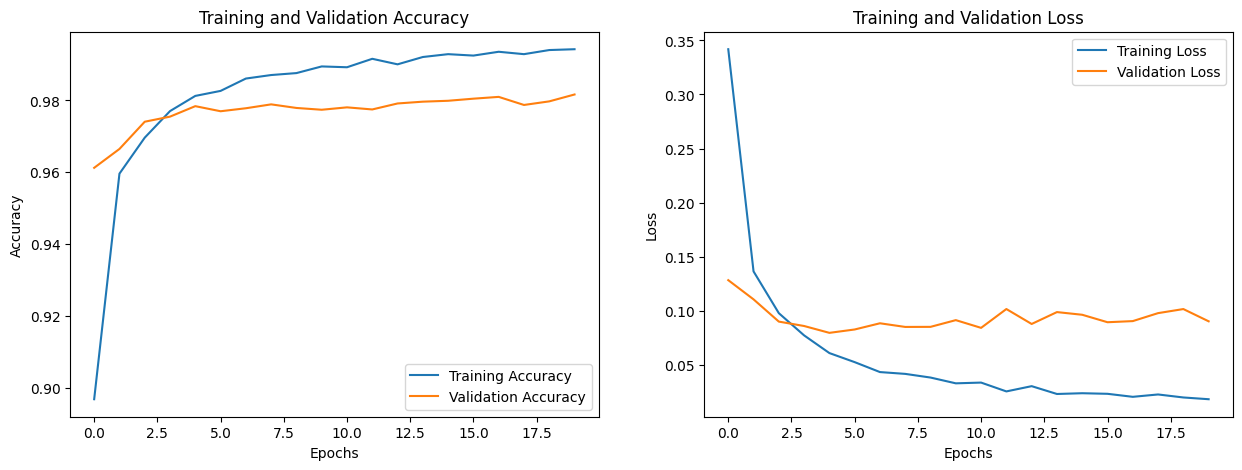

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


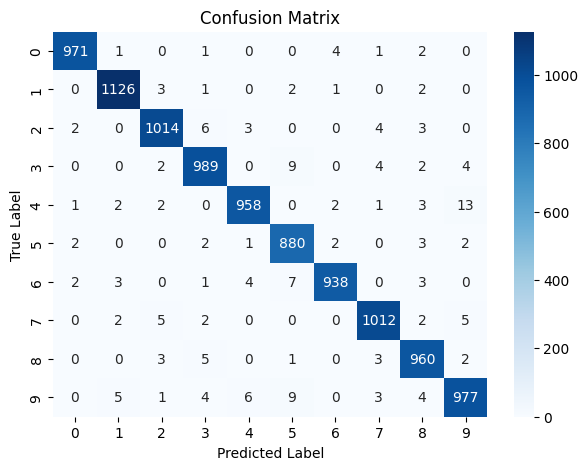

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [12]:
# Predict on the test dataset
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# True class labels
y_true = tf.argmax(y_test, axis=1).numpy()
conf_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy()
# Plot confusion matrix using Seaborn for better visualization
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(class_report)

In [35]:
(x_train, y_train), (x_test, y_test) = load_and_process_dataset(dataset="CIPHAR-10")
model = create_model()
history = train(model, x_train, y_train)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.1825 - loss: 2.2221 - val_accuracy: 0.3258 - val_loss: 1.8599
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3141 - loss: 1.8885 - val_accuracy: 0.3665 - val_loss: 1.7790
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.3349 - loss: 1.8324 - val_accuracy: 0.3818 - val_loss: 1.7253
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3613 - loss: 1.7701 - val_accuracy: 0.3875 - val_loss: 1.7081
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.3687 - loss: 1.7483 - val_accuracy: 0.4025 - val_loss: 1.6752
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3832 - loss: 1.7118 - val_accuracy: 0.4084 - val_loss: 1.6684
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3826 - loss: 1.7008 - val_accuracy: 0.4071 - val_loss: 1.6586
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3937 - loss: 1.6829 - val_accu

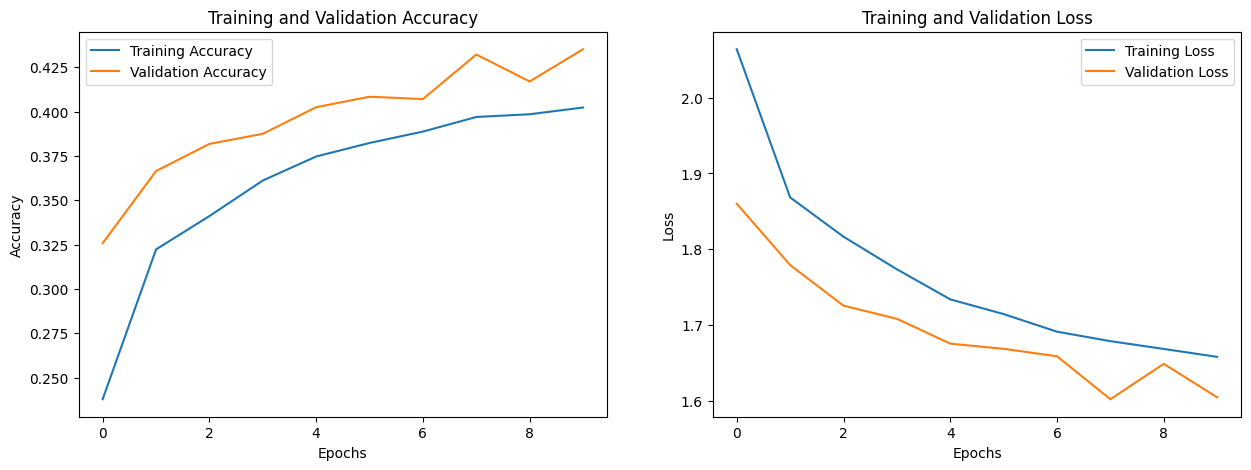

In [36]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


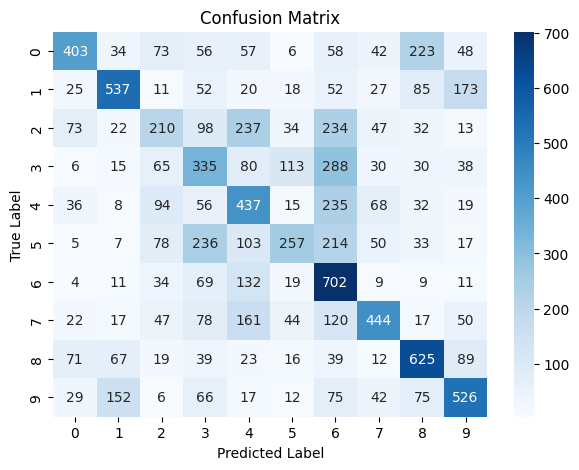

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.40      0.48      1000
           1       0.62      0.54      0.57      1000
           2       0.33      0.21      0.26      1000
           3       0.31      0.34      0.32      1000
           4       0.34      0.44      0.39      1000
           5       0.48      0.26      0.34      1000
           6       0.35      0.70      0.47      1000
           7       0.58      0.44      0.50      1000
           8       0.54      0.62      0.58      1000
           9       0.53      0.53      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000



In [37]:
# Predict on the test dataset
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# True class labels
y_true = tf.argmax(y_test, axis=1).numpy()
conf_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy()
# Plot confusion matrix using Seaborn for better visualization
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(class_report)